In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)  #added to view all cols

# Load the data
# nongroupedsentiment2.csv uses allactivity
# nongroupedsentiment3.csv uses posts only
data = pd.read_csv('../non_group_sent_synonyms.csv')
data = data[data['shifted'] != 0]
# Get the count of comments per subreddit
subreddit_counts = data['subreddit'].value_counts()
# filter for subreddits with more than 40 counts
# by CLT, assuming data is normally distributed
data = data.groupby('subreddit').filter(lambda x: len(x) > 40)
print(subreddit_counts)

data2 = data[data['subreddit']=="The_Donald"]

# Set the figure size


subreddit
democrats              258
uspolitics             199
PoliticalDiscussion    192
politics               189
Republican             180
Liberal                179
AmericanPolitics       152
The_Donald             134
Conservative           131
NeutralPolitics         87
environment             61
Libertarian             57
immigration             55
Firearms                21
Economics               12
guncontrol              10
prochoice                9
guns                     6
healthcare               4
Name: count, dtype: int64


In [2]:
data2

,author,id,title,selftext,subreddit,subreddit_id,created_utc,score,year,month,text,sentiment,politician_mentioned,shifted
18,[deleted],5jxmm8,Former secretary of labor and current Berkeley...,[deleted],The_Donald,t5_38unr,2016-12-23 15:32:35,23,2016,12,Former secretary of labor and current Berkeley...,-0.4939,True,-0.4939
30,[deleted],40qkx7,These are exactly the kind of comments Trump m...,[deleted],The_Donald,t5_38unr,2016-01-13 05:28:03,1,2016,1,These are exactly the kind of comments Trump m...,-0.5719,True,-0.5719
35,20-Gauge,54h33i,CLINTON CAMPAIGN ACCEPTING LOSS OF OHIO...Mich...,NaN,The_Donald,t5_38unr,2016-09-25 20:55:58,23,2016,9,CLINTON CAMPAIGN ACCEPTING LOSS OF OHIO...Mich...,-0.2023,True,-0.2023
173,thunderbert80,5g9t2e,"Paul Joseph Watson: ""The media is freaking out...",NaN,The_Donald,t5_38unr,2016-12-03 14:37:18,22297,2016,12,"Paul Joseph Watson: ""The media is freaking out...",-0.6124,True,-0.6124
200,Nick360S,4nanb9,South Africans for Trump!,Im not even American(Though I really wish I wa...,The_Donald,t5_38unr,2016-06-09 12:52:08,30,2016,6,South Africans for Trump! Im not even American...,-0.6917,True,-0.6917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,[deleted],4q7p8j,ALL of Christopher Hitchens' criticisms of Hil...,[deleted],The_Donald,t5_38unr,2016-06-28 04:52:03,3,2016,6,ALL of Christopher Hitchens' criticisms of Hil...,-0.2263,True,-0.2263
7791,[deleted],529qmd,"I just made a dope ass music video called ""I L...",[deleted],The_Donald,t5_38unr,2016-09-11 17:57:48,16,2016,9,"I just made a dope ass music video called ""I L...",-0.4069,True,-0.4069
7800,LORD_TRUMP,42zcnq,Trump mocks Cruz debate challenge: 'Can we do ...,NaN,The_Donald,t5_38unr,2016-01-27 20:03:10,49,2016,1,Trump mocks Cruz debate challenge: 'Can we do ...,-0.4019,True,-0.4019
7917,emilysteve,4n6tww,"NATO Chief Agrees With Donald Trump, Europe Sh...",NaN,The_Donald,t5_38unr,2016-06-08 19:23:11,13,2016,6,"NATO Chief Agrees With Donald Trump, Europe Sh...",-0.2023,True,-0.2023


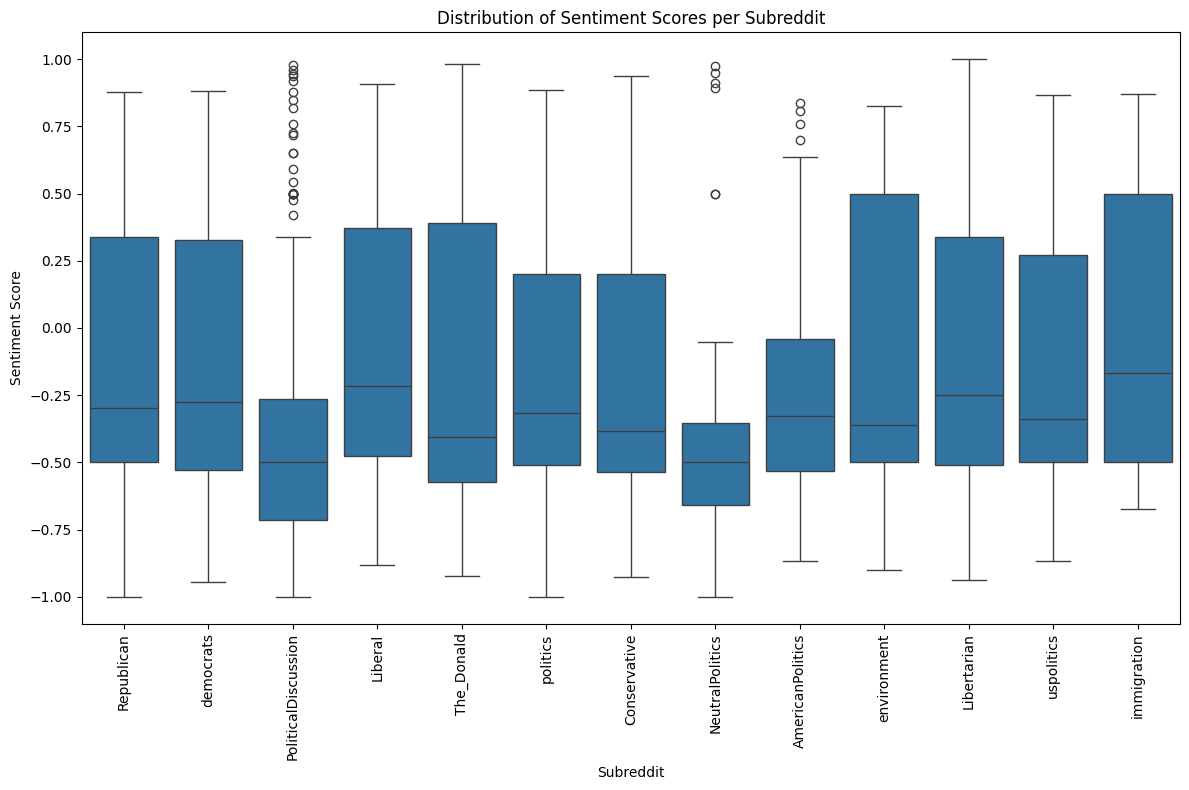

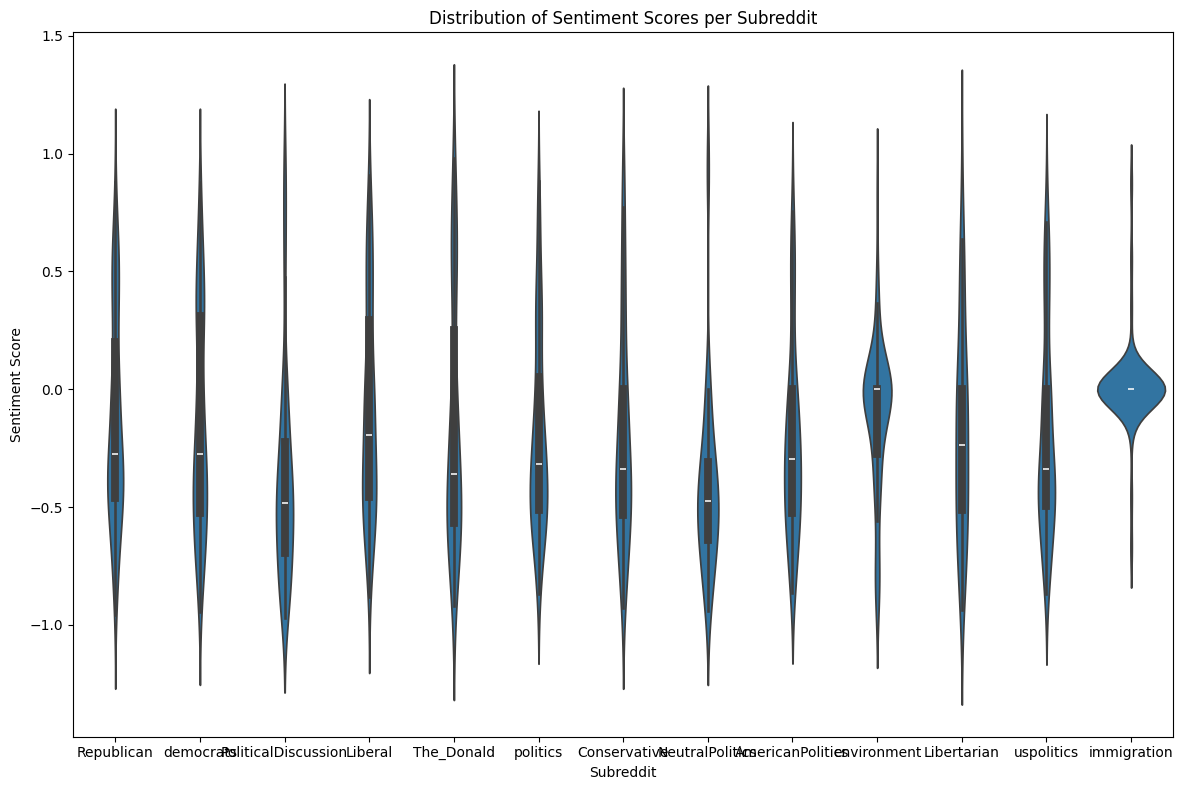

<Figure size 640x480 with 0 Axes>

In [3]:
plt.figure(figsize=(12, 8))

# Create a boxplot
sns.boxplot(x='subreddit', y='shifted', data=data)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Set titles and labels
plt.title('Distribution of Sentiment Scores per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Sentiment Score')
# Show the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='subreddit', y='sentiment', data=data)
plt.title('Distribution of Sentiment Scores per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Sentiment Score')
# Show the plot
plt.tight_layout()
plt.show()
plt.savefig('nonsynonymssentiment.png')
